## Table of Contents
<ul>
<li><a href="#data_loading">data_loading</a></li>
<li><a href="#data_cleanning">data_cleanning</a></li>
<li><a href="#cleanning_summary">cleanning_summary</a></li> 
<li><a href="#split_the_data">split_the_data</a></li>
<li><a href="#feature_engineering">feature_engineering</a></li>
<li><a href="#dealing_with_imbalanced_data">dealing_with_imbalanced_data</a></li>
<li><a href="#features_normalize_and_onehot_encoding">features_normalize_and_onehot_encoding</a></li>
<li><a href="#building_models">building_models</a></li>
1.) log regression<br>
2.) log_SGD<br>
3.) SVC<br>
4.) SVC_SGD<br>
5.) random forest<br>
6.) XGBoosting<br>
7.) ADABoosting<br>
8.) naive base<br>
<li><a href="#load_test_set">load_test_set</a></li>
<li><a href="#transfer_test_set_as_We_did_with_train_set">transfer_test_set_as_We_did_with_train_set</a></li>
<li><a href="#apply_trained_models_on_test_set">apply_trained_models_on_test_set</a></li>
<li><a href="#compare_results">compare_results</a></li>
</ul>
                

In [1]:
import pandas as pd 
import numpy as np

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression , SGDClassifier ,LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix ,f1_score , accuracy_score
from sklearn.model_selection import cross_val_score , cross_val_predict , GridSearchCV , StratifiedShuffleSplit , train_test_split
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

import sys
sys.path.append('D:\Bi electric scolership\EDA')
from script import eda_script

<a id='data_loading'></a>
## loading and explore data using our script:

DataFrame : 


,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


data info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel   

,count,mean,std,min,25%,50%,75%,max
age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
dailyrate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
distancefromhome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
employeecount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
employeenumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
environmentsatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
hourlyrate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
jobinvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
joblevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


NaN percentage for each column : 


,name,percentage
0,age,0.0%
1,attrition,0.0%
2,businesstravel,0.0%
3,dailyrate,0.0%
4,department,0.0%
5,distancefromhome,0.0%
6,education,0.0%
7,educationfield,0.0%
8,employeecount,0.0%
9,employeenumber,0.0%


there is no NaNs in data to impute
check skewness for numerical after imputing : 


,col_name,skew_value,skew_type
0,age,0.413,positive
1,dailyrate,-0.004,negative
2,distancefromhome,0.957,positive
3,education,-0.289,negative
4,employeecount,0.000,no_skew
5,employeenumber,0.017,positive
6,environmentsatisfaction,-0.321,negative
7,hourlyrate,-0.032,negative
8,jobinvolvement,-0.498,negative
9,joblevel,1.024,positive


count values for categorical columns : 
attrition column's count values : 


,value,count
0,No,1233
1,Yes,237


businesstravel column's count values : 


,value,count
0,Travel_Rarely,1043
1,Travel_Frequently,277
2,Non-Travel,150


department column's count values : 


,value,count
0,Research & Development,961
1,Sales,446
2,Human Resources,63


educationfield column's count values : 


,value,count
0,Life Sciences,606
1,Medical,464
2,Marketing,159
3,Technical Degree,132
4,Other,82


gender column's count values : 


,value,count
0,Male,882
1,Female,588


jobrole column's count values : 


,value,count
0,Sales Executive,326
1,Research Scientist,292
2,Laboratory Technician,259
3,Manufacturing Director,145
4,Healthcare Representative,131


maritalstatus column's count values : 


,value,count
0,Married,673
1,Single,470
2,Divorced,327


over18 column's count values : 


,value,count
0,Y,1470


overtime column's count values : 


,value,count
0,No,1054
1,Yes,416


some plots : 


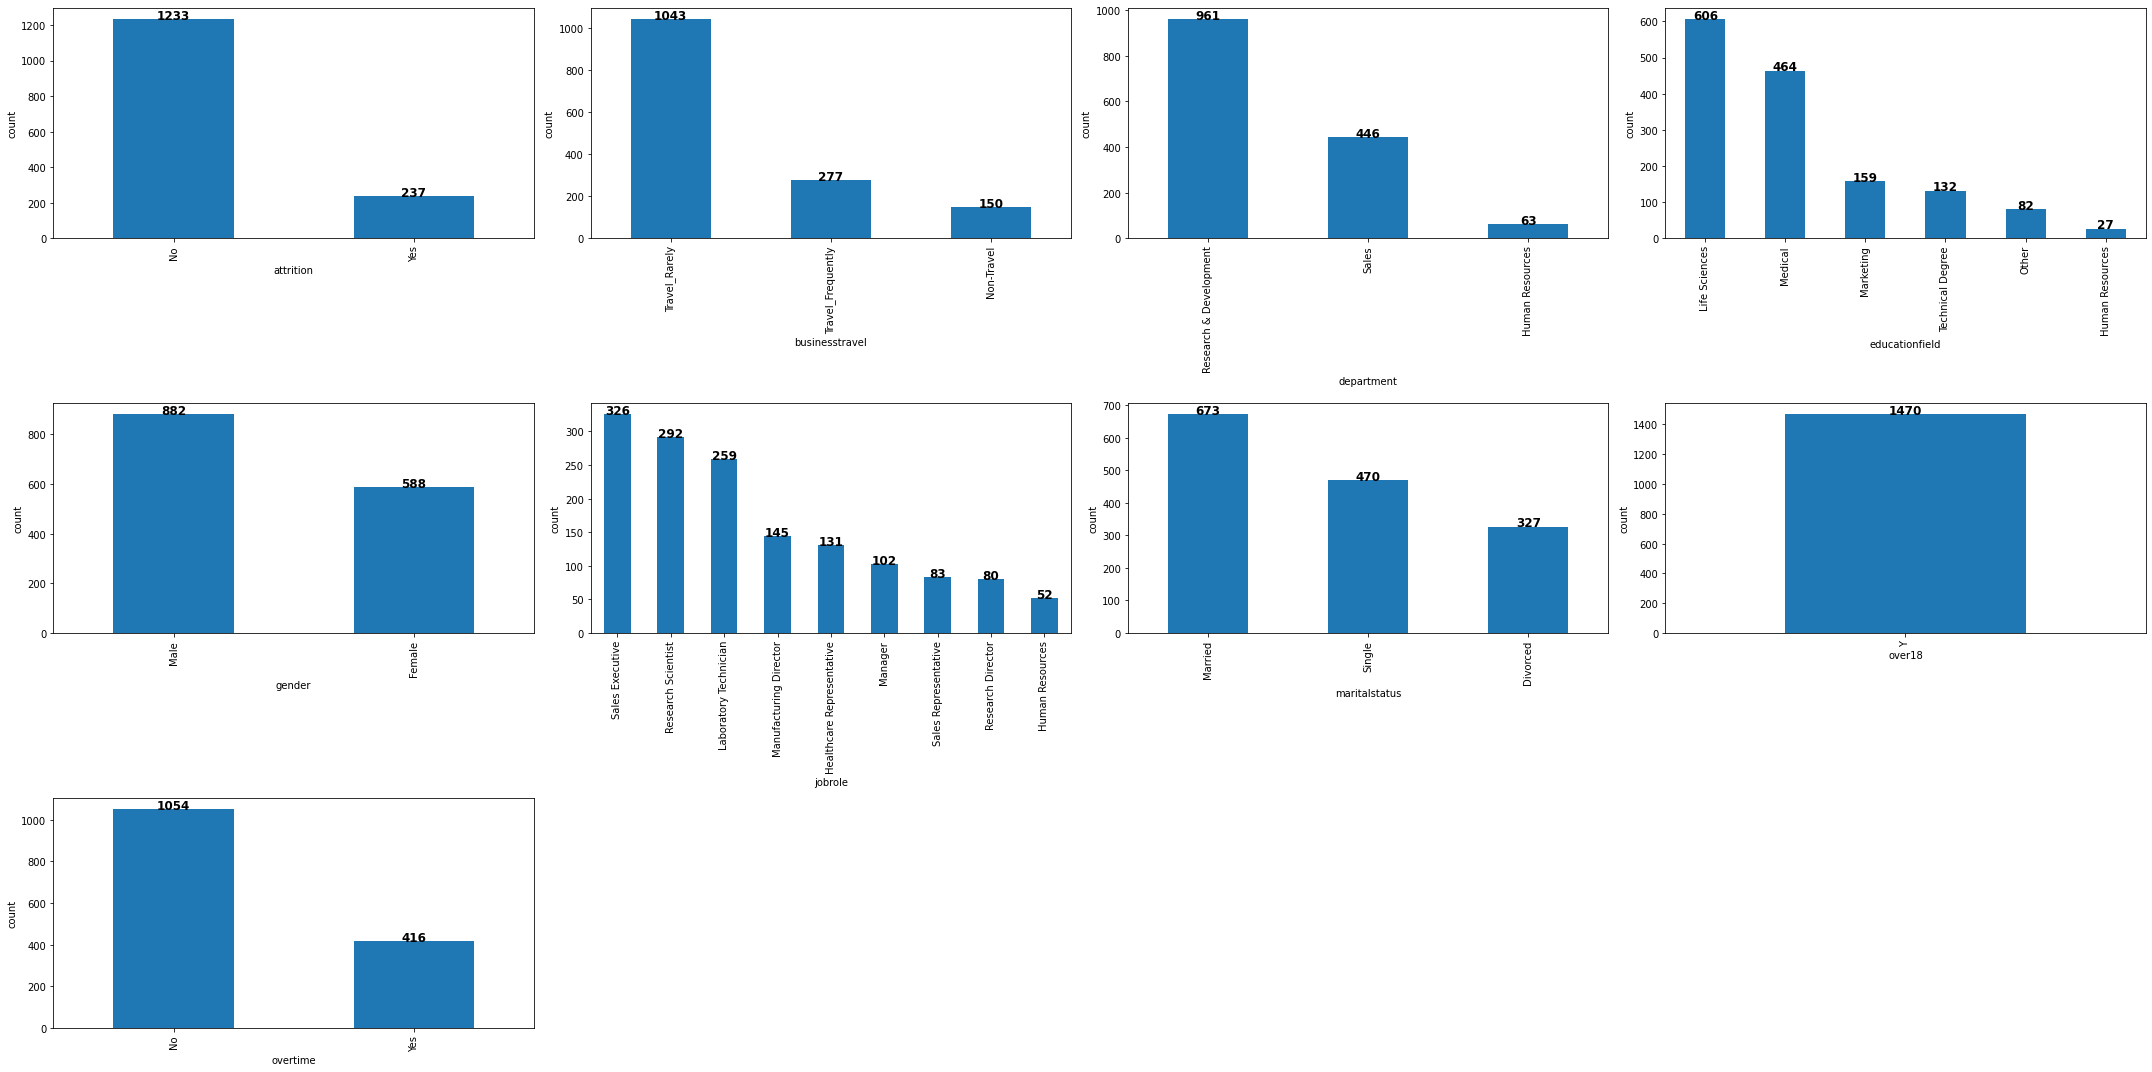

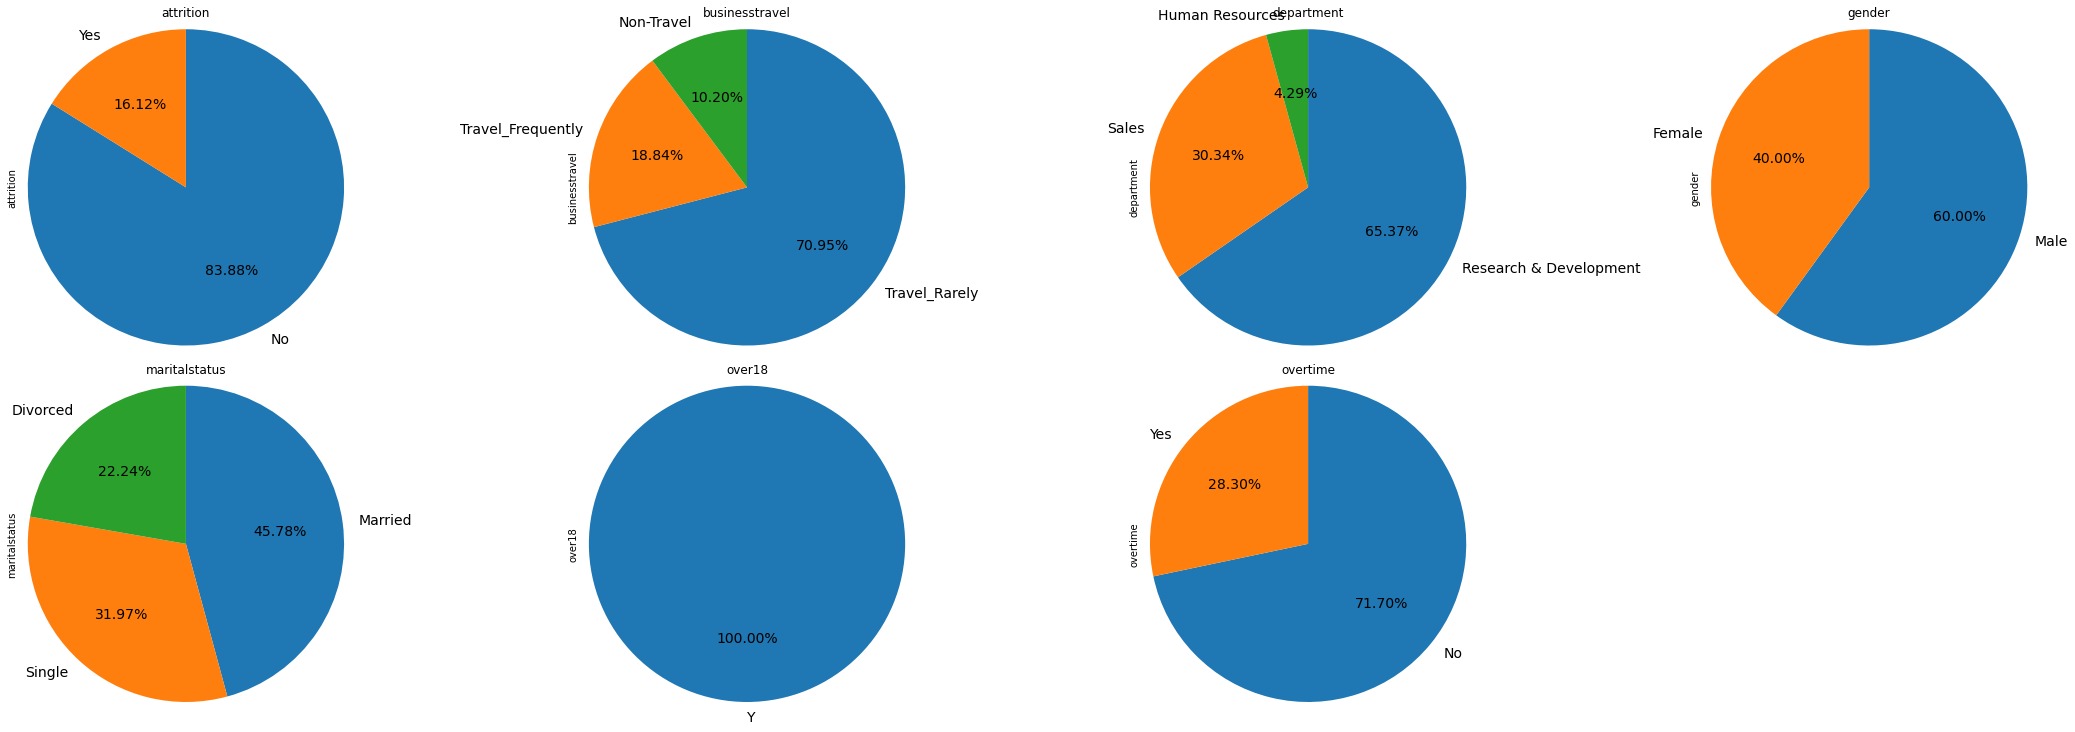

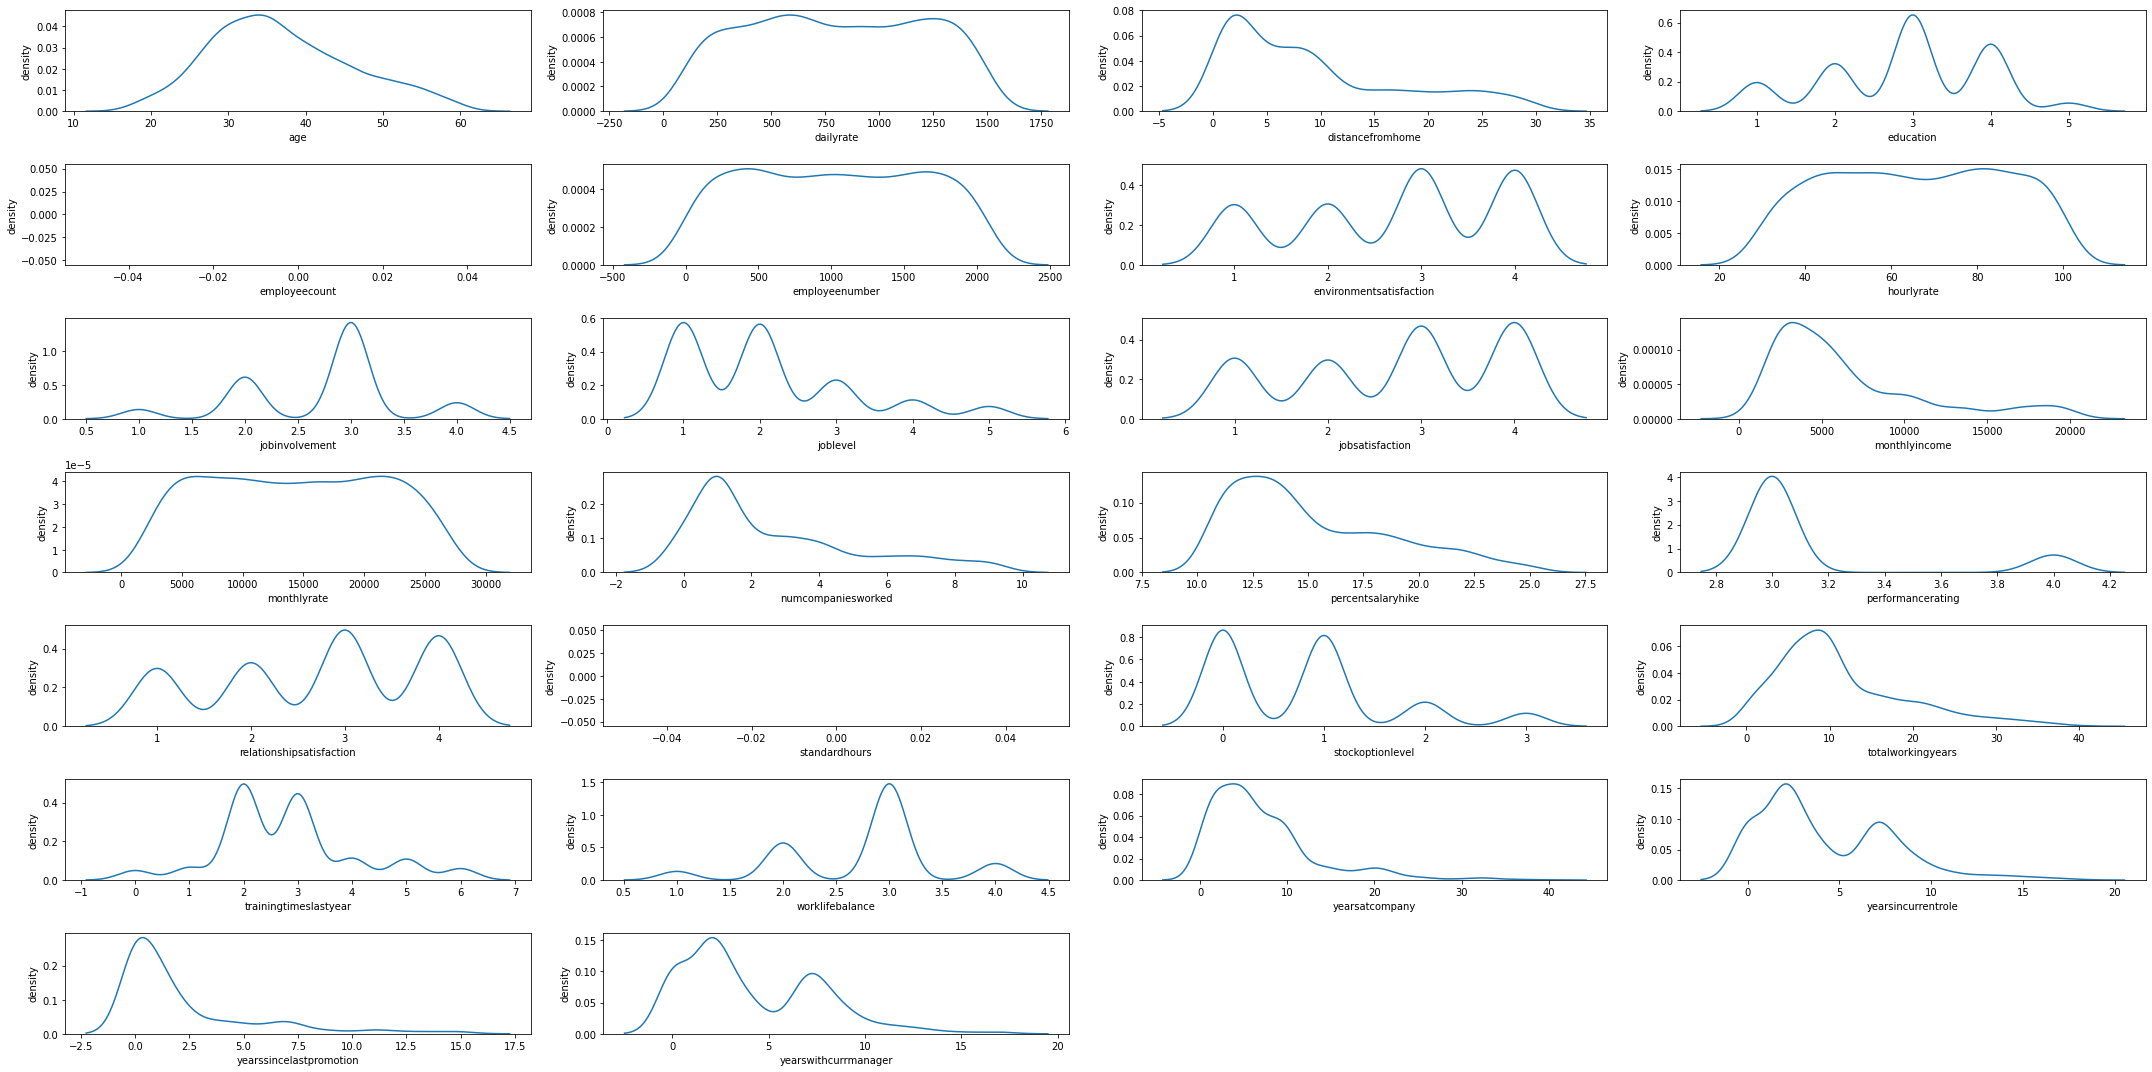

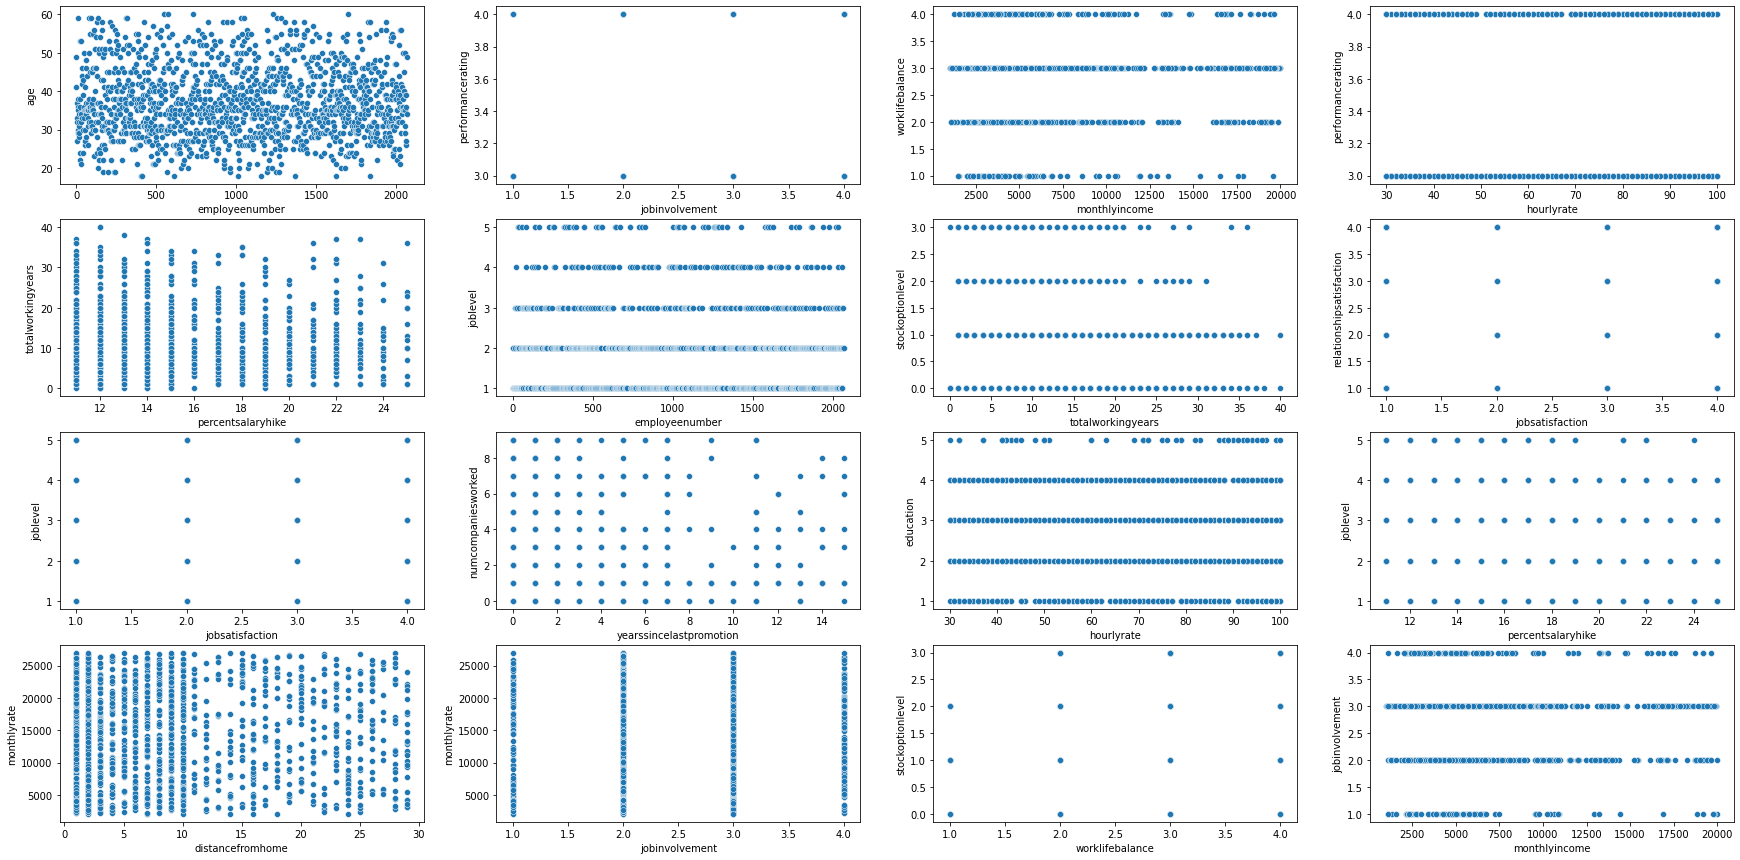

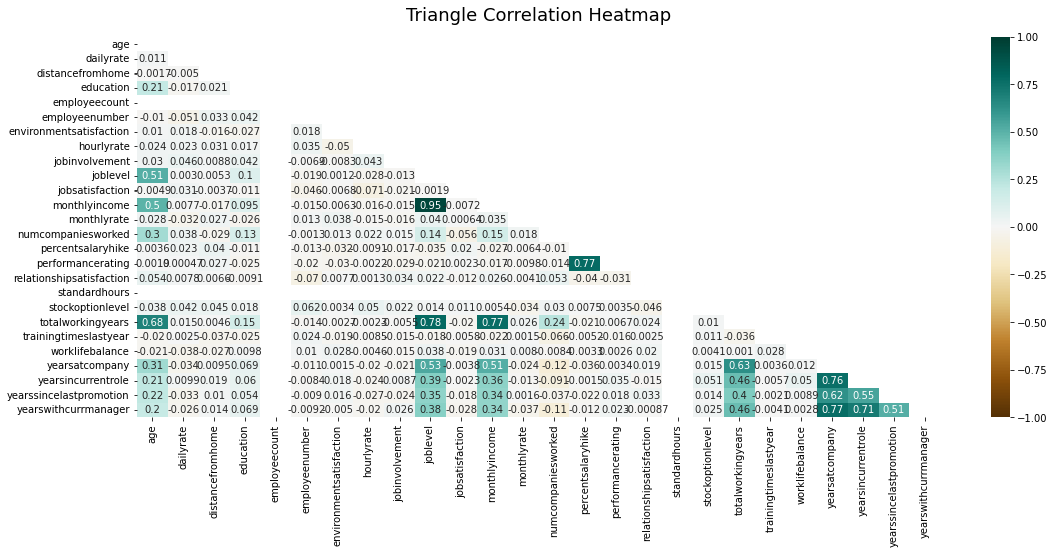

In [144]:
data = eda_script('./WA_Fn-UseC_-HR-Employee-Attrition.csv' , box_plot=False)

> i modified thee script and give the option to use boxplot or not
- we did not use box plot because of the huge number of column so i will do the manually

<a id='insights_from_exploring_script_results'></a>
## insights from exploring script results :



1- `employeecount` column for all the rows has the same value 1 so we will drop it ` i get this from data describtion as min and max are the same `

2- `over18` column also has the same value yes for all rows so i will also drop it

3- `standardhours`	also has the same value for all the rows which is 80

4- `monthlyincome` may have outliers

5- `employeenumber` has alot of unique values so i may be as employee id thus i will drop it

6- there is a high corr between `joblevel and monthlyincome ` => `0.95` and that will lead to `Multicollinearity` problem
- Multicollinearity happens when one predictor `"indepented"` variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results. Luckily, decision trees and boosted trees algorithms are immune to multicollinearity by nature. When they decide to split, the tree will choose only one of the perfectly correlated features. However, other algorithms like Logistic Regression or Linear Regression are not immune to that problem and you should fix it before training the model.
- not just there is a corr between `joblevel and monthlyincome ` there is other correlated features so we should consider cleaing that `using PCA` maybe
- i will try using PCA to get rid of correlated features , and i will also try feature selection to see which one will be better
- because there are many correlated features i can not just fix it manually 
- note : i will also consider using `l1` to work as build in feature selaection 

- Imbalanced dataset: 1237 (84% of cases) employees did not leave the organization while 237 (16% of cases) did leave the organization 

<a id='data_cleanning'></a>
## data_cleanning : 

> i will drop the one value coulmns first

In [145]:
df = data.copy()

In [146]:
df['attrition'] = df['attrition'].replace('Yes' , 1)
df['attrition'] = df['attrition'].replace('No' , 0)

In [147]:
df.drop(['employeecount' , 'over18' ,'standardhours' ,'employeenumber'] , axis = 1 , inplace = True)

In [148]:
df.shape[1]
# before doing anthing just from observation i was able to reduce number of features
# - now i only have 30 features and 1 target variable

31

In [149]:
from script import  seperate_columns
num_col , cat_col =  seperate_columns(df)

In [9]:
print('len of numerical variables is : ',len(num_col))
print('len of categorical variables is : ',len(cat_col))

len of numerical variables is :  24
len of categorical variables is :  7


<a id='cleanning_summary'></a>
## summary : 
-  i droped `employeecount` , `over18` ,`standardhours` ,`employeenumber` because they only have one value for all rows
- i chnaged `attrition` to unmerical col with `1 , 0` values
> we have a lot of features , have alot of features may lead to overfitting or it may reduce the accuracy if there were irrelevent column , of cource ib addition to the huge comutational time 
- so we need to reduce the dimensinality of our feature :
   - we can do that using feature selection in which we will select the high ranked columns amoung all the columns that we have
   - we can use feature extraction where we will extract new feature from our features using ways like `PCA`
- i will try the two methods and see which one give me better results     

<a id='split_the_data'></a>
## splitting the data :

> #### note that : we should split the data first before anything
 - and because we are having imbalanced data then i should use `stratified sampling`.
 - note that i will oversample the training data after spliting ,but ican't oversample the whole dataset before spliting 
   - and that is because when spliting , test set may have some samples as in the train  

In [150]:
split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.3 , random_state=42) 
for train_index , test_index in split.split(df , df['attrition']):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

In [22]:
train_set['attrition'].value_counts()[0]/train_set['attrition'].value_counts()[1]

5.198795180722891

In [23]:
test_set['attrition'].value_counts()[0]/test_set['attrition'].value_counts()[1]

5.211267605633803

> we can see that test set and train set almost have the same ratio of target calss
- let's see what will happen if we only used train_test_split

In [24]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [25]:
print(train['attrition'].value_counts()[0] /train['attrition'].value_counts()[1] )
print(test['attrition'].value_counts()[0] /test['attrition'].value_counts()[1] )

4.846590909090909
6.229508196721311


> they are not the same , so i will use train_set and test_set
 - now let's forget about test_set and start explore train_set

<a id='feature_engineering'></a>
### feature selection :

In [48]:
X = train_set.copy()
y = X.pop('attrition')

In [49]:
X.head()

,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
853,19,Travel_Rarely,645,Research & Development,9,2,Life Sciences,3,Male,54,3,1,Research Scientist,1,Single,2552,7172,1,No,25,4,3,0,1,4,3,1,1,0,0
435,33,Travel_Rarely,1277,Research & Development,15,1,Medical,2,Male,56,3,3,Manager,3,Married,13610,24619,7,Yes,12,3,4,0,15,2,4,7,6,7,7
587,52,Travel_Rarely,1325,Research & Development,11,4,Life Sciences,4,Female,82,3,2,Laboratory Technician,3,Married,3149,21821,8,No,20,4,2,1,9,3,3,5,2,1,4
1170,27,Travel_Frequently,591,Research & Development,2,3,Medical,4,Male,87,3,1,Research Scientist,4,Single,2580,6297,2,No,13,3,3,0,6,0,2,4,2,1,2
159,34,Travel_Frequently,303,Sales,2,4,Marketing,3,Female,75,3,1,Sales Representative,3,Married,2231,11314,6,No,18,3,4,1,6,3,3,4,3,1,2


> an inportant step before using `mutual_info_classif` we should first encode categorical column or it will thorw an error
 - it dose not matter the type of categorical column i just need it to be int to i will use `ordinal encoder`

In [50]:
for colname in cat_col:
    X[colname], _ = X[colname].factorize()
    # This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values.

In [43]:
# from sklearn.compose import  ColumnTransformer
# from sklearn.preprocessing import  OrdinalEncoder
# trans_col = ColumnTransformer([('cat' , OrdinalEncoder() , cat_col )] , remainder = 'passthrough')
# trans_X = trans_col.fit_transform(X)

In [52]:
# because we have categorical target variable we will use `mutual_info_classif`
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=42 , copy = True)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [55]:
mi_scores = make_mi_scores(X, y, 'auto')
mi_scores

totalworkingyears           0.043404
yearsincurrentrole          0.041555
monthlyincome               0.038884
jobrole                     0.031649
overtime                    0.031532
age                         0.029285
environmentsatisfaction     0.022055
stockoptionlevel            0.020285
yearsatcompany              0.019696
numcompaniesworked          0.015903
joblevel                    0.014449
performancerating           0.014036
percentsalaryhike           0.013642
worklifebalance             0.011082
maritalstatus               0.010225
yearswithcurrmanager        0.009623
businesstravel              0.008243
department                  0.007564
educationfield              0.006365
jobsatisfaction             0.005217
gender                      0.002731
hourlyrate                  0.001597
jobinvolvement              0.001442
monthlyrate                 0.000000
relationshipsatisfaction    0.000000
education                   0.000000
trainingtimeslastyear       0.000000
d

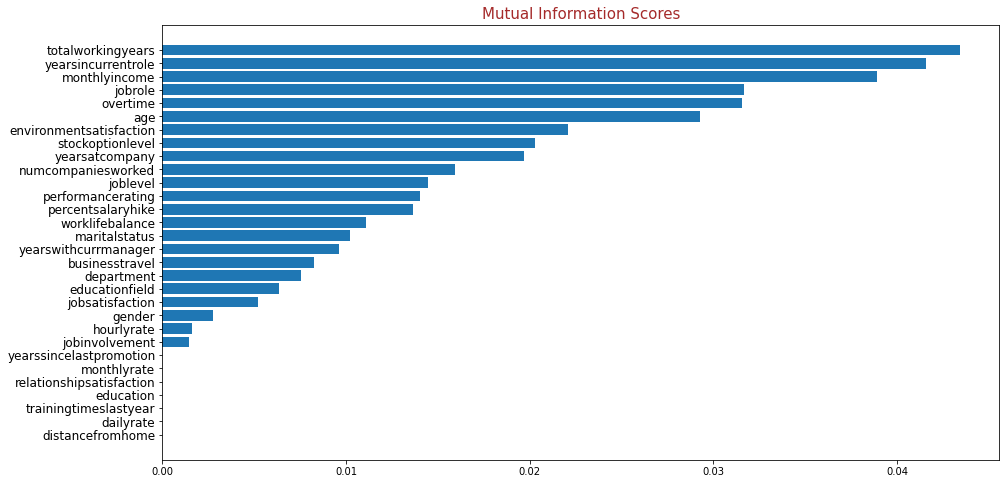

In [58]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks, fontsize=12)
    plt.title("Mutual Information Scores", fontsize=15, color='brown')


plt.figure(figsize=(15, 8))
plot_mi_scores(mi_scores)

In [67]:
best_features = mi_scores.index[0:15]
best_features

Index(['totalworkingyears', 'yearsincurrentrole', 'monthlyincome', 'jobrole',
       'overtime', 'age', 'environmentsatisfaction', 'stockoptionlevel',
       'yearsatcompany', 'numcompaniesworked', 'joblevel', 'performancerating',
       'percentsalaryhike', 'worklifebalance', 'maritalstatus'],
      dtype='object')

In [69]:
X_train = train_set[best_features]
y_train = train_set['attrition']

In [78]:
X_train.head()

,totalworkingyears,yearsincurrentrole,monthlyincome,jobrole,overtime,age,environmentsatisfaction,stockoptionlevel,yearsatcompany,numcompaniesworked,joblevel,performancerating,percentsalaryhike,worklifebalance,maritalstatus
853,1,1,2552,Research Scientist,No,19,3,0,1,1,1,4,25,3,Single
435,15,6,13610,Manager,Yes,33,2,0,7,7,3,3,12,4,Married
587,9,2,3149,Laboratory Technician,No,52,4,1,5,8,2,4,20,3,Married
1170,6,2,2580,Research Scientist,No,27,4,0,4,2,1,3,13,2,Single
159,6,3,2231,Sales Representative,No,34,3,1,4,6,1,3,18,3,Married


> what we still have to do is to fix the problem of imbalanced data , encode categorical variables and scale the data

<a id='dealing_with_imbalanced_data'></a>
## dealing_with_imbalanced_data:

In [80]:
from sklearn.utils import resample

In [81]:
X = pd.concat([X_train, y_train], axis=1)
X.head()

,totalworkingyears,yearsincurrentrole,monthlyincome,jobrole,overtime,age,environmentsatisfaction,stockoptionlevel,yearsatcompany,numcompaniesworked,joblevel,performancerating,percentsalaryhike,worklifebalance,maritalstatus,attrition
853,1,1,2552,Research Scientist,No,19,3,0,1,1,1,4,25,3,Single,0
435,15,6,13610,Manager,Yes,33,2,0,7,7,3,3,12,4,Married,1
587,9,2,3149,Laboratory Technician,No,52,4,1,5,8,2,4,20,3,Married,0
1170,6,2,2580,Research Scientist,No,27,4,0,4,2,1,3,13,2,Single,0
159,6,3,2231,Sales Representative,No,34,3,1,4,6,1,3,18,3,Married,0


In [83]:
# separate minority and majority classes
not_attrition = X[X['attrition']==0]
attrition = X[X['attrition']==1]

# upsample minority
attrition_upsampled = resample(attrition,
                          replace=True, # sample with replacement
                          n_samples=len(not_attrition), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_attrition, attrition_upsampled])

# check new class counts
upsampled['attrition'].value_counts()

0    863
1    863
Name: attrition, dtype: int64

In [84]:
y_train_upsamle = upsampled['attrition']
X_train_upsample = upsampled.drop('attrition', axis=1)
# i get an error while using sklearn when col name was int so i changed it

<AxesSubplot:ylabel='attrition'>

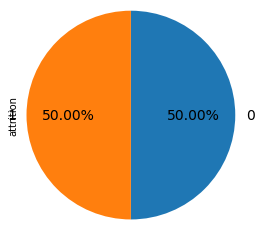

In [86]:
val_count = y_train_upsamle.value_counts()
y_train_upsamle.value_counts().plot.pie(autopct='%.2f%%',labels=val_count.index,startangle=90,counterclock=False , radius=1.2, textprops={'fontsize':14})

<a id='features_normalize_and_onehot_encoding'></a>
### now for encoding and sampling :

> we one only have 3 col columns 
- we will use ordinal encoder with `overtime`
- and onehot encoder with `jobrole` and `maritalstatus`

In [ ]:
num_col , cat_col =  seperate_columns(X_train_upsample)

In [109]:
scaler = StandardScaler()
X_train_upsample[num_col] = scaler.fit_transform(X_train_upsample[num_col])

In [110]:
X_train_upsample['overtime'], _ =X_train_upsample['overtime'].factorize()

In [104]:
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder ,  LabelEncoder
transform = ColumnTransformer([('nominal_cat' , OneHotEncoder() , ['jobrole','maritalstatus'] )]  
                              , remainder='passthrough')

In [111]:
X_train_upsample = transform.fit_transform(X_train_upsample)

<a id='building_models'></a>
## building_models:

**1. logistic regression**

In [174]:
log_model_cv = LogisticRegressionCV(cv=10 , penalty='l1'  , solver = 'saga')

X_train, X_val, y_train, y_val = train_test_split(X_train_upsample, y_train_upsamle, test_size=0.2, random_state=42)

log_model_cv.fit(X_train,y_train )
predict = log_model_cv.predict(X_val)
log_model_cv_score = f1_score(predict,y_val)
print(log_model_cv_score)
pd.DataFrame(confusion_matrix(predict,y_val))


0.7383720930232559


,0,1
0,129,44
1,46,127


In [113]:
sgd_log_classifier  = SGDClassifier(loss = 'log_loss' , penalty='l2')
sgd_log_classifier.fit(X_train,y_train )
predict = sgd_log_classifier.predict(X_val)
sgd_log_classifier_score = f1_score(predict,y_val)
print(sgd_log_classifier_score)
pd.DataFrame(confusion_matrix(predict,y_val))

# note : if we run this cell another time it will get us another score

0.6997084548104957


,0,1
0,123,51
1,52,120


> logistic regression with batch gradient gived better results than SGD 

**2. Random Forest**

In [118]:
param_grid = [
    {'n_estimators':[3,10,30] , 'max_features' :[2,4,6,8] , 'min_samples_split' :[5,10,15]}
]

In [119]:
forest = RandomForestClassifier()
forest_grid_search = GridSearchCV(forest , param_grid  ,cv=10 , scoring = 'f1' , return_train_score=True)
forest_grid_search.fit(X_train_upsample , y_train_upsamle)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'min_samples_split': [5, 10, 15],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='f1')

In [120]:
forest_grid_search.best_estimator_

RandomForestClassifier(max_features=2, min_samples_split=5, n_estimators=30)

In [121]:
forest_score = forest_grid_search.best_score_
print(forest_score)

0.9771766510515756


In [122]:
predict = forest_grid_search.predict(X_train_upsample)
pd.DataFrame(confusion_matrix(predict,y_train_upsamle))

,0,1
0,861,1
1,2,862


**3. SVC**

In [123]:
svc_model = SVC()
param_grid = [
    {'kernel':['rbf' , 'poly'] , 'degree' :[1,2,3,4,5,6] }
] 
svc_grid_search = GridSearchCV(svc_model , param_grid  ,cv=10 , scoring = 'f1' , return_train_score=True)
svc_grid_search.fit(X_train_upsample , y_train_upsamle)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'degree': [1, 2, 3, 4, 5, 6],
                          'kernel': ['rbf', 'poly']}],
             return_train_score=True, scoring='f1')

In [124]:
svc_grid_search.best_params_

{'degree': 3, 'kernel': 'poly'}

In [125]:
svc_score = svc_grid_search.best_score_
print(svc_score)

0.8944897519601749


In [126]:
predict = svc_grid_search.predict(X_train_upsample)
pd.DataFrame(confusion_matrix(predict,y_train_upsamle))

,0,1
0,812,67
1,51,796


In [127]:
svc_grid_search.fit(X_train , y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'degree': [1, 2, 3, 4, 5, 6],
                          'kernel': ['rbf', 'poly']}],
             return_train_score=True, scoring='f1')

In [128]:
print(svc_grid_search.best_params_)
print(svc_grid_search.best_score_)
predict = svc_grid_search.predict(X_train_upsample)
pd.DataFrame(confusion_matrix(predict,y_train_upsamle))

{'degree': 3, 'kernel': 'poly'}
0.8634923516767665


,0,1
0,804,81
1,59,782


In [129]:
sgd_svc_classifier  = SGDClassifier(loss = 'hinge' , penalty='l2') # SVC takes l2
sgd_svc_classifier.fit(X_train,y_train )
predict = sgd_svc_classifier.predict(X_val)
sgd_svc_classifier_score = f1_score(predict,y_val)
print(sgd_svc_classifier_score)
pd.DataFrame(confusion_matrix(predict,y_val))


0.7076923076923077


,0,1
0,136,56
1,39,115


> `sgd_svc_classifier` gives better performance than `svc`

**4. XGBoosting**

In [130]:
param_grid = {'learning_rate': [0.001,0.01,0.03,0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
              'n_estimators': [10,20,30,40,50],
              'max_depth': [2, 4, 6, 8],
              'subsample': [0.1, 0.3, 0.6, 0.9]
              
             }    
xgb_model = XGBClassifier()

In [131]:
xg_grid_search = GridSearchCV(xgb_model , param_grid  ,cv=10 , scoring = 'f1' , return_train_score=True)
xg_grid_search.fit(X_train_upsample , y_train_upsamle)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40, 50],
                         'subsample': [0.1, 0.3, 0.6, 0.9]},
             return_train_score=True, scoring='f1')

In [132]:
print(xg_grid_search.best_params_)
xg_score = xg_grid_search.best_score_
print(xg_score)
predict = xg_grid_search.predict(X_train_upsample)
pd.DataFrame(confusion_matrix(predict,y_train_upsamle))

{'learning_rate': 0.4, 'max_depth': 8, 'n_estimators': 50, 'subsample': 0.9}
0.9701118683203459


,0,1
0,863,0
1,0,863


**5. ADA Boost**

In [135]:
param_grid = {'learning_rate': [0.001,0.01,0.03,0.1, 0.2, 0.3, 0.4, 0.5, 0.6 , 0.7],
              'n_estimators': [10,20,30,40,50]
             } 

ada = AdaBoostClassifier()
ada_grid_search = GridSearchCV(ada , param_grid  ,cv=10 , scoring = 'f1' , return_train_score=True)
ada_grid_search.fit(X_train_upsample , y_train_upsamle)

print(ada_grid_search.best_params_)
ada_score = ada_grid_search.best_score_
print(ada_score)
predict = ada_grid_search.predict(X_train_upsample)
pd.DataFrame(confusion_matrix(predict,y_train_upsamle))

{'learning_rate': 0.6, 'n_estimators': 40}
0.7943008203327551


,0,1
0,694,151
1,169,712


**6. Naive Bayes**

In [176]:
X_train, X_val, y_train, y_val = train_test_split(X_train_upsample, y_train_upsamle, test_size=0.2, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train,y_train)
predict = gnb.predict(X_val)
gnb_score = f1_score(predict,y_val)
print(gnb_score)
pd.DataFrame(confusion_matrix(predict,y_val))

0.7142857142857143


,0,1
0,94,31
1,81,140


<a id='test_set'></a>
## test_set:
### now let's see the test set

In [138]:
test_set.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
397,25,0,Travel_Rarely,891,Sales,4,2,Life Sciences,2,Female,99,2,2,Sales Executive,4,Single,4487,12090,1,Yes,11,3,2,0,5,3,3,5,4,1,3
832,37,0,Travel_Rarely,367,Research & Development,25,2,Medical,3,Female,52,2,2,Healthcare Representative,4,Divorced,5731,17171,7,No,13,3,3,2,9,2,3,6,2,1,3
483,35,0,Travel_Rarely,538,Research & Development,25,2,Other,1,Male,54,2,2,Laboratory Technician,4,Single,3681,14004,4,No,14,3,4,0,9,3,3,3,2,0,2
456,31,0,Travel_Rarely,688,Sales,7,3,Life Sciences,3,Male,44,2,3,Manager,4,Divorced,11557,25291,9,No,21,4,3,1,10,3,2,5,4,0,1
1342,34,0,Travel_Rarely,1480,Sales,4,3,Life Sciences,3,Male,64,3,3,Sales Executive,4,Married,9713,24444,2,Yes,13,3,4,3,9,3,3,5,3,1,0


<a id='transfer_test_set_as_We_did_with_train_set'></a>
## transfer_test_set_as_We_did_with_train_set:

In [151]:
test_set.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
397,25,0,Travel_Rarely,891,Sales,4,2,Life Sciences,2,Female,99,2,2,Sales Executive,4,Single,4487,12090,1,Yes,11,3,2,0,5,3,3,5,4,1,3
832,37,0,Travel_Rarely,367,Research & Development,25,2,Medical,3,Female,52,2,2,Healthcare Representative,4,Divorced,5731,17171,7,No,13,3,3,2,9,2,3,6,2,1,3
483,35,0,Travel_Rarely,538,Research & Development,25,2,Other,1,Male,54,2,2,Laboratory Technician,4,Single,3681,14004,4,No,14,3,4,0,9,3,3,3,2,0,2
456,31,0,Travel_Rarely,688,Sales,7,3,Life Sciences,3,Male,44,2,3,Manager,4,Divorced,11557,25291,9,No,21,4,3,1,10,3,2,5,4,0,1
1342,34,0,Travel_Rarely,1480,Sales,4,3,Life Sciences,3,Male,64,3,3,Sales Executive,4,Married,9713,24444,2,Yes,13,3,4,3,9,3,3,5,3,1,0


In [170]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1029.0,36.945578,9.165414,18.0,30.0,36.0,43.0,60.0
attrition,1029.0,0.161322,0.368006,0.0,0.0,0.0,0.0,1.0
dailyrate,1029.0,809.543246,397.666730,103.0,479.0,805.0,1157.0,1499.0
distancefromhome,1029.0,9.298348,8.160561,1.0,2.0,7.0,14.0,29.0
education,1029.0,2.893100,1.031715,1.0,2.0,3.0,4.0,5.0
environmentsatisfaction,1029.0,2.706511,1.085528,1.0,2.0,3.0,4.0,4.0
hourlyrate,1029.0,65.141885,20.345204,30.0,47.0,65.0,82.0,100.0
jobinvolvement,1029.0,2.731778,0.709833,1.0,2.0,3.0,3.0,4.0
joblevel,1029.0,2.082604,1.084906,1.0,1.0,2.0,3.0,5.0
jobsatisfaction,1029.0,2.706511,1.109460,1.0,2.0,3.0,4.0,4.0


In [169]:
test_set.describe().T

,count,mean,std,min,25%,50%,75%,max
age,441.0,36.873016,9.075052,18.0,30.0,36.0,43.0,59.0
attrition,441.0,0.160998,0.367946,0.0,0.0,0.0,0.0,1.0
dailyrate,441.0,786.018141,416.818098,102.0,427.0,783.0,1169.0,1495.0
distancefromhome,441.0,8.945578,7.983889,1.0,2.0,7.0,12.0,29.0
education,441.0,2.959184,1.005966,1.0,2.0,3.0,4.0,5.0
environmentsatisfaction,441.0,2.757370,1.110936,1.0,2.0,3.0,4.0,4.0
hourlyrate,441.0,67.639456,20.207653,30.0,51.0,67.0,85.0,100.0
jobinvolvement,441.0,2.725624,0.716368,1.0,2.0,3.0,3.0,4.0
joblevel,441.0,2.020408,1.156814,1.0,1.0,2.0,2.0,5.0
jobsatisfaction,441.0,2.780045,1.086764,1.0,2.0,3.0,4.0,4.0


In [153]:
X_test = test_set.copy()
y_test = X_test.pop('attrition')

In [155]:
def data_preprocessing( df: pd.DataFrame)  -> pd.DataFrame :
     
    df = df[best_features] # apply feature selection
    num_col , cat_col =  seperate_columns(df)
    df[num_col] = scaler.transform(df[num_col])
    df['overtime'], _ =df['overtime'].factorize()
    df = transform.transform(df)
    return df

In [156]:
X_test = data_preprocessing(X_test)

In [157]:
X_test

array([[ 0.        ,  0.        ,  0.        , ..., -0.42683929,
        -1.11148415,  0.39077005],
       [ 1.        ,  0.        ,  0.        , ..., -0.42683929,
        -0.56226524,  0.39077005],
       [ 0.        ,  0.        ,  1.        , ..., -0.42683929,
        -0.28765579,  0.39077005],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.42683929,
        -1.11148415,  0.39077005],
       [ 0.        ,  0.        ,  0.        , ..., -0.42683929,
        -0.28765579,  1.69535246],
       [ 1.        ,  0.        ,  0.        , ..., -0.42683929,
        -0.28765579,  0.39077005]])

<a id='apply_trained_models_on_test_set'></a>
## apply_trained_models_on_test_set:

**1. test_log**

In [181]:
predict = log_model_cv.predict(X_test)
log_model_cv_score_test = accuracy_score(predict,y_test)
print(log_model_cv_score_test)
pd.DataFrame(confusion_matrix(predict,y_test))


0.47619047619047616


,0,1
0,173,34
1,197,37


**2. test_log_SGD**

In [182]:
predict = sgd_log_classifier.predict(X_test)
sgd_log_classifier_test = accuracy_score(predict,y_test)
print(sgd_log_classifier_test)
pd.DataFrame(confusion_matrix(predict,y_test))

0.49206349206349204


,0,1
0,178,32
1,192,39


**3. test_SVC**

In [183]:
predict = svc_grid_search.predict(X_test)
SVC_score_test = accuracy_score(predict,y_test)
print(SVC_score_test)
pd.DataFrame(confusion_matrix(predict,y_test))

0.6575963718820862


,0,1
0,264,45
1,106,26


**4. test_SVC_SGD**

In [184]:
sgd_svc_classifier
predict = sgd_svc_classifier.predict(X_test)
sgd_svc_classifier_test = accuracy_score(predict,y_test)
print(sgd_svc_classifier_test)
pd.DataFrame(confusion_matrix(predict,y_test))

0.5011337868480725


,0,1
0,190,40
1,180,31


**5. test_forest**

In [180]:
from sklearn.metrics import 
predict = forest_grid_search.predict(X_test)
forest_score_test = accuracy_score(predict,y_test)
print(forest_score_test)
pd.DataFrame(confusion_matrix(predict,y_test))

0.780045351473923


,0,1
0,328,55
1,42,16


**6. test_XGBoosting**

In [185]:
predict = xg_grid_search.predict(X_test)
xg_score_test = accuracy_score(predict,y_test)
print(xg_score_test)
pd.DataFrame(confusion_matrix(predict,y_test))

0.7006802721088435


,0,1
0,294,56
1,76,15


**7. test_ADA Boost**

In [186]:
predict = ada_grid_search.predict(X_test)
ada_score_test = accuracy_score(predict,y_test)
print(ada_score_test)
pd.DataFrame(confusion_matrix(predict,y_test))

0.5170068027210885


,0,1
0,194,37
1,176,34


**8. test_naive base**

In [187]:
predict = gnb.predict(X_test)
gnb_score_test = accuracy_score(predict,y_test)
print(gnb_score_test)
pd.DataFrame(confusion_matrix(predict,y_test))

0.49206349206349204


,0,1
0,159,13
1,211,58


<a id='compare_results'></a>
## compare_results:

In [188]:
result = [[log_model_cv_score , log_model_cv_score_test],
          [sgd_log_classifier_score , sgd_log_classifier_test],
          [svc_score , SVC_score_test],
          [sgd_svc_classifier_score , sgd_svc_classifier_test],
          [forest_score , forest_score_test],
          [xg_score , xg_score_test],
          [ada_score , ada_score_test],
          [gnb_score , gnb_score_test]]

In [189]:
result_df = pd.DataFrame(result , columns=['train','test'] , index=['log' ,'sgd_log' , 'SVC','SGD_SVC','forest','xg' , 'ada' ,'gnb'])

In [190]:
result_df

,train,test
log,0.738372,0.476190
sgd_log,0.699708,0.492063
SVC,0.894490,0.657596
SGD_SVC,0.707692,0.501134
forest,0.977177,0.780045
xg,0.970112,0.700680
ada,0.794301,0.517007
gnb,0.714286,0.492063
